## How to use NLTK library

***

This notebook is to practice using NLTK and do word sampling purposes.

In [ ]:
# Initialize NLTK
# import nltk
# nltk.download('popular')

In [ ]:
#nltk.__version__

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
#import fasttext
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.probability import FreqDist

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
%matplotlib inline

In [2]:
blogs = pd.read_csv('en_US.blogs.txt', sep="\t", header=None, names=["words"])

In [3]:
blogs

,words
0,"In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”."
1,We love you Mr. Brown.
2,"Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank. He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him."
3,"so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get our home."
4,"With graduation season right around the corner, Nancy has whipped up a fun set to help you out with not only your graduation cards and gifts, but any occasion that brings on a change in one's life. I stamped the images in Memento Tuxedo Black and cut them out with circle Nestabilities. I embossed the kraft and red cardstock with TE's new Stars Impressions Plate, which is double sided and gives you 2 fantastic patterns. You can see how to use the Impressions Plates in this tutorial Taylor created. Just one pass through your die cut machine using the Embossing Pad Kit is all you need to do - super easy!"
...,...
878607,"The hulking mass of unfinished brick and concrete at 20-13 35th St. is so unsightly, it became a poster child for zoning reform."
878608,"The 2004 IIFA award ceremony witnessed a contingent of over 450 stars, celebrities, cricketers, industrialists and government leaders over the festive weekend."
878609,"Plus, I have also been allowing myself not to get ‘stressed’ over things that have not been done! If the ironing is not done right now, it’s not the end of the world! If that phone call is made tomorrow rather than today, then that’s OK too! Living in the moment and allowing myself the time to get ‘back to feeling great’!"
878610,(5) What's the barrier to entry and why is the business sustainable?


In [4]:
blogs2 = blogs.sample(n=1000, random_state=0)

In [5]:
blogs2.head()

,words
337850,"We have given our hearts away, a sordid boon !”"
611929,1. Start it on the side
668026,"Sugar’s sweet, so is she,"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award."
736471,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.


In [6]:
blogs2.reset_index(inplace=True, drop=True)

In [7]:
blogs2

,words
0,"We have given our hearts away, a sordid boon !”"
1,1. Start it on the side
2,"Sugar’s sweet, so is she,"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award."
4,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.
...,...
995,"Now that school is back in session, niece Emma is spending her days with us again. She arrives about 7:30, well before Frank and Chloe wake up, so she and I spend the mornings chatting, just we two. These conversations are sometimes, oh, mundane I suppose: what we did last night, what we're thinking about doing today."
996,"“The steep downgrade is premised on the heightened likelihood of default on the group’s CP/MTN following a series of unfavourable developments announced on Feb 29,” it said."
997,"Because it’s all about one objective: ASSIMILATION. The sooner we get off the reserve, the sooner they push the Land Management Agreement on us, & the sooner we accept these and start living in the cities or start selling our land then the agreements that were signed over a hundred years ago will be null and void. We as a people, with our Aboriginal rights and Treaty rights will cease to exist, and this would make the government really happy. So take these cuts for what they are an attack on us as a people. So pick up your pen or whatever and write a letter to the Minister of Health, write to your local MP’s these are just the cuts we can see, what about the ones that we won’t see until we have to see a doctor and need medication or worse a medical procedure and we have to shell out. Enough is enough! Let’s not sit back and be passive about these things anymore. If we let them get away with this we open the door for more, cuz if you give the government an inch they are gonna take a..."
998,"happy friday, dear friends. i can't wait for you to share all of your book covers with me."


In [8]:
#Save as CSV for processing
#blogs2.to_csv("blogdata_1000.csv", index=False)

### Tokenization

In [5]:
blogs2['tokenized'] = blogs2['words'].apply(word_tokenize)

In [6]:
blogs2.head()

,words,tokenized
337850,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]"
611929,1. Start it on the side,"[1, ., Start, it, on, the, side]"
668026,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]"
736471,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]"


### Lower Case Letters

In [7]:
blogs2['lower'] = blogs2['tokenized'].apply(lambda x: [word.lower() for word in x])

In [8]:
blogs2.head()

,words,tokenized,lower
337850,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]"
611929,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]"
668026,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]"
736471,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]","[nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., he, works, best, with, things, he, can, quantify, ., he, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., he, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]"


### Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
blogs2['stemming'] = blogs2["lower"].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
blogs2.head()

### Lemmatization

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
blogs2['lemma'] = blogs2['lower'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [11]:
blogs2.head()

,words,tokenized,lower,lemma
337850,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]"
611929,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]"
668026,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]"
736471,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., He, works, best, with, things, he, can, quantify, ., He, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., He, isn, ’, t, without, a, sense, of, humor, and, is, very, loving, but, he, is, forced, to, radically, confront, his, limitations, .]","[nicholas, ’, brain, runs, on, and, is, excellent, at, processing, data, and, concrete, facts, ., he, works, best, with, things, he, can, quantify, ., he, runs, into, an, almost, insurmountable, challenge, in, trying, to, rationalize, the, existence, of, his, exceptional, infant, daughter, and, what, she, represents, ., 

### Removing Punctuations

In [12]:
punc = string.punctuation

In [13]:
blogs2['no_punc'] = blogs2['lemma'].apply(lambda x: [word for word in x if word not in punc])

In [14]:
blogs2.head()

,words,tokenized,lower,lemma,no_punc
337850,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, a, sordid, boon, ”]"
611929,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, start, it, on, the, side]"
668026,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, so, is, she]"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, the, next, thing, you, know, i, have, asian, kid, following, me, around, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, i, wa, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, go, on, to, say, something, like, “, it, wa, not, that, i, wa, a, hero, it, wa, everyone, around, me, wa, acting, so, badly, ”, when, someone, won, a, ...]"
736471,Nicholas’ brain runs on and is excellent at processing data and concrete facts. He works best with things he can quantify. He runs into an almost insurmountable challenge in trying to rationalize the existence of his exceptional infant daughter and what she represents. He isn’t without a sense of humor and is very loving but he is forced to radically confront his limitations.,"[Nicholas, ’, brain, runs, on, and, is, excellent, at, p

### Removing Stopwords

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
blogs2['stopwords_removed'] = blogs2['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])

In [17]:
blogs2.head()

,words,tokenized,lower,lemma,no_punc,stopwords_removed
337850,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, a, sordid, boon, ”]","[given, heart, away, sordid, boon, ”]"
611929,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, start, it, on, the, side]","[1, start, side]"
668026,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, so, is, she]","[sugar, ’, sweet]"
462003,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, the, next, thing, you, know, i, have, asian, kid, following, me, around, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, i, wa, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, go, on, to, say, something, like, “, it, wa, not, that, i, wa, a, hero, it, wa, everyone, around, me, wa, acting, so, badly, ”, when, someone, won, a, ...]","[asian, community, wa, need, tight-knit, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, “, wonderful, ”, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, “, wa, wa, hero, wa, everyone, around, wa, acting, badly, ”, someone, 

### Removing numbers and remaining punctuation marks

In [20]:
blogs2.head()

,words,tokenized,lower,lemma,no_punc,stopwords_removed
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, a, sordid, boon, ”]","[given, heart, away, sordid, boon, ”]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, start, it, on, the, side]","[1, start, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, so, is, she]","[sugar, ’, sweet]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, the, next, thing, you, know, i, have, asian, kid, following, me, around, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, i, wa, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, go, on, to, say, something, like, “, it, wa, not, that, i, wa, a, hero, it, wa, everyone, around, me, wa, acting, so, badly, ”, when, someone, won, a, ...]","[asian, community, wa, need, tight-knit, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, “, wonderful, ”, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, “, wa, wa, hero, wa, everyone, around, wa, acting, badly, ”, someone, humanitarian, award]

In [22]:
blogs2['final'] = blogs2['stopwords_removed'].apply(lambda x: [word for word in x if word.isalpha()])

In [24]:
blogs2.head()

,words,tokenized,lower,lemma,no_punc,stopwords_removed,final
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, a, sordid, boon, ”]","[given, heart, away, sordid, boon, ”]","[given, heart, away, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, start, it, on, the, side]","[1, start, side]","[start, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, so, is, she]","[sugar, ’, sweet]","[sugar, sweet]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, the, next, thing, you, know, i, have, asian, kid, following, me, around, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, i, wa, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, go, on, to, say, something, like, “, it, wa, not, that, i, wa, a, hero, it, wa, everyone, around, me, wa, acting, so, badly, ”, when, someone, won, a, ...]","[asian, community, wa, need, tight-knit, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, “, wonderful, ”, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, “, wa, wa, her

### Drop columns and save to csv

In [18]:
blogs2.reset_index(inplace=True, drop=True)

In [25]:
blogs2.head()

,words,tokenized,lower,lemma,no_punc,stopwords_removed,final
0,"We have given our hearts away, a sordid boon !”","[We, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, hearts, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, ,, a, sordid, boon, !, ”]","[we, have, given, our, heart, away, a, sordid, boon, ”]","[given, heart, away, sordid, boon, ”]","[given, heart, away, sordid, boon]"
1,1. Start it on the side,"[1, ., Start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, ., start, it, on, the, side]","[1, start, it, on, the, side]","[1, start, side]","[start, side]"
2,"Sugar’s sweet, so is she,","[Sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, ,, so, is, she, ,]","[sugar, ’, s, sweet, so, is, she]","[sugar, ’, sweet]","[sugar, sweet]"
3,"So because the Asian community was so by need tight-knit, the next thing you know I have Asian kids following me around, you know doing more shit for me than the boys that wanted inside of me. Especially the two in particular. They thought I was “so wonderful” which sickened me even further. I was not wonderful, it reminds me of that quote, from WWII era forget it but goes on to say something like, “It was not that I was a hero, it was everyone around me was acting so badly” when someone won a humanitarian award.","[So, because, the, Asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, I, have, Asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., Especially, the, two, in, particular, ., They, thought, I, was, “, so, wonderful, ”, which, sickened, me, even, further, ., I, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, WWII, era, forget, it, but, goes, on, to, say, something, like, ,, “, It, was, not, that, I, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, was, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kids, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boys, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, was, “, so, wonderful, ”, which, sickened, me, even, further, ., i, was, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, goes, on, to, say, something, like, ,, “, it, was, not, that, i, was, a, hero, ,, it, was, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, ,, the, next, thing, you, know, i, have, asian, kid, following, me, around, ,, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, ., especially, the, two, in, particular, ., they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, ., i, wa, not, wonderful, ,, it, reminds, me, of, that, quote, ,, from, wwii, era, forget, it, but, go, on, to, say, something, like, ,, “, it, wa, not, that, i, wa, a, hero, ,, it, wa, everyone, around, me, ...]","[so, because, the, asian, community, wa, so, by, need, tight-knit, the, next, thing, you, know, i, have, asian, kid, following, me, around, you, know, doing, more, shit, for, me, than, the, boy, that, wanted, inside, of, me, especially, the, two, in, particular, they, thought, i, wa, “, so, wonderful, ”, which, sickened, me, even, further, i, wa, not, wonderful, it, reminds, me, of, that, quote, from, wwii, era, forget, it, but, go, on, to, say, something, like, “, it, wa, not, that, i, wa, a, hero, it, wa, everyone, around, me, wa, acting, so, badly, ”, when, someone, won, a, ...]","[asian, community, wa, need, tight-knit, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, “, wonderful, ”, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, “, wa, wa, her

In [26]:
blogs2.columns

Index(['words', 'tokenized', 'lower', 'lemma', 'no_punc', 'stopwords_removed', 'final'], dtype='object')

In [27]:
blogs2.drop(['words', 'tokenized', 'lower', 'lemma', 'no_punc', 'stopwords_removed'], axis=1, inplace=True)

In [28]:
blogs2

,final
0,"[given, heart, away, sordid, boon]"
1,"[start, side]"
2,"[sugar, sweet]"
3,"[asian, community, wa, need, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, wonderful, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, wa, wa, hero, wa, everyone, around, wa, acting, badly, someone, humanitarian, award]"
4,"[nicholas, brain, run, excellent, processing, data, concrete, fact, work, best, thing, quantify, run, almost, insurmountable, challenge, trying, rationalize, existence, exceptional, infant, daughter, represents, without, sense, humor, loving, forced, radically, confront, limitation]"
...,...
9995,"[perfect, timing, friday, fragment, jumble, thing, unload, jumbled, thought, fabulous, blogger, go, visit]"
9996,"[herbert, paid, debt, society, twiddling, away, day, solitary, confinement, herbert, personally, prohibited, becoming, familiar, inmate, wa, stranded, friend, anyone, option, became, fact, get, along, others, especially, confined, place, whenever, wa, general, population, pursued, fight, daily, basis, argument, passion, asshole, soon, became, middle, name, even, meanest, mean, would, mess, herbert, year, put, definition, anger, crease, drawn, face, look, psychopath, wa, naturally, etched, smile, inmate, made, point, stay, away, herbert, whenever, kept, solitude, however, wa, alone, away, prisoner, herbert, wa, perfect, inmate, guard, problem, came, understanding, herbert, caused, fight, order, stay, general, population, clooney, behave, one, guard, said, herbert, mind, havin, taste, ...]"
9997,"[warning, sun]"
9998,"[sherry, john, young, house, love, teaming, katie, bower, power, host, winter, edition, pinterest, challenge, get, people, stop, pinning, start, affiliated, pinterest, company, rule, find, something, pinterest, inspires, create, version, join, young, house, love, big, pinterest, challenge, linky, party, wednesday, march, sound, fun, right, joining, challenge, sofa, table, makeover]"


In [29]:
blogs2.to_csv("blogclean.csv",index=False)

### EDA

In [ ]:
blogs2 = pd.read_csv("blogclean.csv")

In [30]:
df = blogs2.copy()

In [31]:
df.head()

,final
0,"[given, heart, away, sordid, boon]"
1,"[start, side]"
2,"[sugar, sweet]"
3,"[asian, community, wa, need, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, wonderful, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, wa, wa, hero, wa, everyone, around, wa, acting, badly, someone, humanitarian, award]"
4,"[nicholas, brain, run, excellent, processing, data, concrete, fact, work, best, thing, quantify, run, almost, insurmountable, challenge, trying, rationalize, existence, exceptional, infant, daughter, represents, without, sense, humor, loving, forced, radically, confront, limitation]"


In [ ]:
df = df[["stopwords_removed"]]

In [ ]:
df.head()

In [32]:
df['word_count'] = df['final'].apply(lambda x: len(str(x).split()))

In [33]:
df.head()

,final,word_count
0,"[given, heart, away, sordid, boon]",5
1,"[start, side]",2
2,"[sugar, sweet]",2
3,"[asian, community, wa, need, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, wonderful, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, wa, wa, hero, wa, everyone, around, wa, acting, badly, someone, humanitarian, award]",47
4,"[nicholas, brain, run, excellent, processing, data, concrete, fact, work, best, thing, quantify, run, almost, insurmountable, challenge, trying, rationalize, existence, exceptional, infant, daughter, represents, without, sense, humor, loving, forced, radically, confront, limitation]",31


<AxesSubplot:>

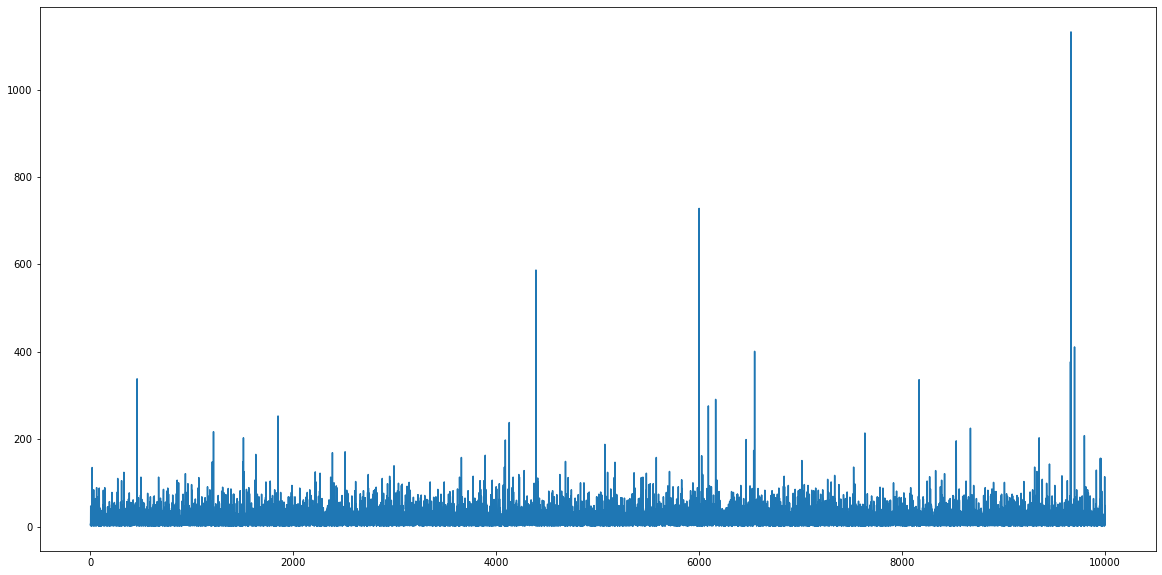

In [34]:
df["word_count"].plot(figsize=(20,10))

In [59]:
# Word Counts
df["final"].apply(lambda x: len(str(x).split()))

0         5
1         2
2         2
3        47
4        31
       ... 
9995     13
9996    114
9997      2
9998     48
9999     13
Name: final, Length: 10000, dtype: int64

In [60]:
# Characters count
df["final"].apply(lambda x: len(x))

0         5
1         2
2         2
3        47
4        31
       ... 
9995     13
9996    114
9997      2
9998     48
9999     13
Name: final, Length: 10000, dtype: int64

In [62]:
df['char_count'] = df["final"].apply(lambda x: len(x))

In [64]:
df.head()

,final,word_count,char_count
0,"[given, heart, away, sordid, boon]",5,5
1,"[start, side]",2,2
2,"[sugar, sweet]",2,2
3,"[asian, community, wa, need, next, thing, know, asian, kid, following, around, know, shit, boy, wanted, inside, especially, two, particular, thought, wa, wonderful, sickened, even, wa, wonderful, reminds, quote, wwii, era, forget, go, say, something, like, wa, wa, hero, wa, everyone, around, wa, acting, badly, someone, humanitarian, award]",47,47
4,"[nicholas, brain, run, excellent, processing, data, concrete, fact, work, best, thing, quantify, run, almost, insurmountable, challenge, trying, rationalize, existence, exceptional, infant, daughter, represents, without, sense, humor, loving, forced, radically, confront, limitation]",31,31


In [63]:
df.describe()

,word_count,char_count
count,10000.0000,10000.000000
mean,21.4078,21.401700
std,27.9932,27.997756
min,1.0000,0.000000
25%,4.0000,4.000000
50%,14.0000,14.000000
75%,30.0000,30.000000
max,1132.0000,1132.000000


In [52]:
words = df['final']
allwords = []
for wordlist in words:
    allwords+= wordlist

In [53]:
print(allwords)

['given', 'heart', 'away', 'sordid', 'boon', 'start', 'side', 'sugar', 'sweet', 'asian', 'community', 'wa', 'need', 'next', 'thing', 'know', 'asian', 'kid', 'following', 'around', 'know', 'shit', 'boy', 'wanted', 'inside', 'especially', 'two', 'particular', 'thought', 'wa', 'wonderful', 'sickened', 'even', 'wa', 'wonderful', 'reminds', 'quote', 'wwii', 'era', 'forget', 'go', 'say', 'something', 'like', 'wa', 'wa', 'hero', 'wa', 'everyone', 'around', 'wa', 'acting', 'badly', 'someone', 'humanitarian', 'award', 'nicholas', 'brain', 'run', 'excellent', 'processing', 'data', 'concrete', 'fact', 'work', 'best', 'thing', 'quantify', 'run', 'almost', 'insurmountable', 'challenge', 'trying', 'rationalize', 'existence', 'exceptional', 'infant', 'daughter', 'represents', 'without', 'sense', 'humor', 'loving', 'forced', 'radically', 'confront', 'limitation', 'speech', 'economic', 'inequality', 'reelection', 'game', 'dinner', 'taking', 'picture', 'race', 'outfit', 'sure', 'see', 'wore', 'sunday', 

In [38]:
mostcommon = FreqDist(allwords).most_common(20)

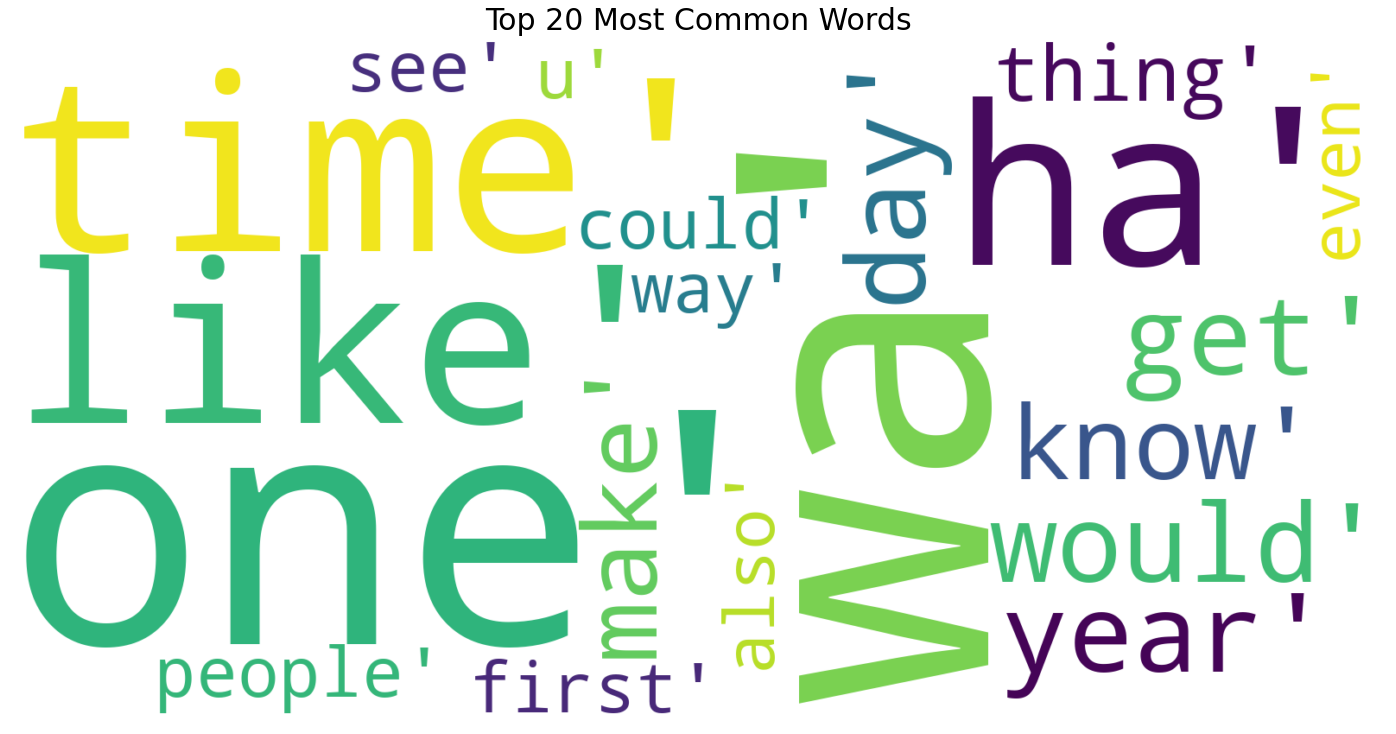

In [39]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 20 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)
plt.show()

### Combine words in a list

In [50]:
allwords = ''.join(str(df['final']))

In [51]:
allwords

'0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   [given, heart, away, sordid, boon]\n1                                                                                                                                                                                              